# 주요 관광명소들의 인기변화
- 2021년 기준 '한국관광 데이터랩' 사이트에서 관광명소 자료를 받아와서, 구글트렌드에서 인기변화를 살펴본다. 

In [1]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# Matplotlib 한글 폰트 설정
from matplotlib import font_manager as fm, rc

# 한글 폰트 설정
font_path = '../Font/malgun.ttf'
font_name = fm.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)


### 경로, 클래스, 함수 설정

In [ ]:
# 경로 설정
PATH = './CORONA_DATA/'

# 클래스 설정
class displayer(): 
    def __init__(self, file):
        FILENAME = PATH + file
        self.df = pd.read_csv(FILENAME, encoding='cp949', index_col= '순위')

    def information(self):
        # df의 정보탐색
        print(self.df.columns)
        print(self.df['중분류'].unique())
        print(self.df['소분류'].unique())
        print(self.df['중분류'].value_counts())
        print(self.df['소분류'].value_counts())

    def correction(self):    
        # 소분류 항목 줄이는 함수
        # 자연경관(산)과 자연경관(하천/해양)은 통합
        self.df.loc[['(' in index for index in self.df['소분류']], '소분류'] = '자연경관'

        # 기타관광~기타음식 -> 기타라는 항목으로 통합
        del_list = list(self.df['소분류'].value_counts().index[5:15])
        cond = self.df['소분류'].isin(del_list)
        self.df.loc[cond, '소분류'] = '기타'

        # 잘 작동됐는지 체크
        print(self.df['소분류'].unique())

    def makecond(self, col, search):
        """
        self.df -> DataFramesearch -> 원하는 값, col -> 컬럼명, return: 조건에 맞는 DataFrame
        ex) self.makecond('소분류', '쇼핑몰')
        """
        cond = self.df[col] == search
        print(self.df[cond])

        # 파일명을 입력 -> (표를 출력하고), 상관관계 히트맵이랑 연간 변화율 보여주는 그래프

# 함수 설정
def make_heatmap(filename):
    # 구글 트렌드의 경우
    df = pd.read_csv(PATH + f'{filename}.csv', skiprows=2)

    # 가끔 1보다 작은 값이 '<1' 형태로 들어가서 행이 obj가 되기 때문에 int로 처리하는 과정
    df.replace('<1', 0, inplace=True)
    object_list = [(idx > 1) & (df[col].dtypes == object) for idx, col in enumerate(df.columns)]
    df.loc[:,object_list] = df.loc[:,object_list].astype(int)

    # heatmap 만드는 과정
    plt.rcParams['figure.figsize'] = (15, 8)
    sns.heatmap(df.corr(), annot=True)
    df.plot(kind='line')


def make_bar(filename):
    """
    input: filename -> output: 5가지 bar graph 
    """
    for i in [1,2,3,4,5]:
        df = pd.read_csv(PATH + f'{filename}_{i}.csv', skiprows=2, index_col= '지역')
        color = ['firebrick', 'y', 'g', 'cyan', 'gold']  # 색깔도 추가
        df.plot(kind='bar', color=color[i-1])
      
# 정보 탐색
tour = displayer('20220711164757_toursearchrank.csv')
tour.df

지역
강원도         39
경기도         87
경상남도        35
경상북도        32
광주광역시       29
대구광역시       36
대전광역시       47
부산광역시       60
서울특별시      100
울산광역시       42
인천광역시       47
전라남도        25
전라북도        28
제주특별자치도     41
충청남도        39
충청북도        35
Name: 이케아: (18. 1. 1.~22. 6. 30.), dtype: int64


ValueError: shape mismatch: objects cannot be broadcast to a single shape

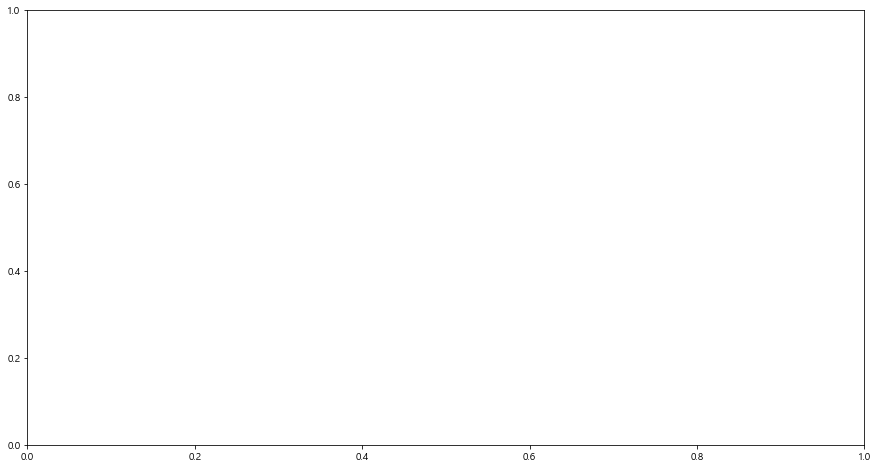

In [46]:
def make_bar2(filename):
    """
    input: filename -> output: 5가지 bar graph 
    """
    labels = []; values = []
    for i in [1,2,3,4,5]:
        df = pd.read_csv(PATH + f'{filename}_{i}.csv', skiprows=2, index_col= '지역')
        df.sort_index(inplace=True)
        labels.append(df.iloc[:,0].name)
        values.append(df.iloc[:,0])
    color = ['firebrick', 'y', 'g', 'cyan', 'gold']  # 색깔도 추가
    # return value = someList[0].iloc[:,0]
    # 그림 사이즈, 바 굵기 조정
    fig, ax = plt.subplots()
    bar_width = 0.25

    # 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
    index = np.arange(len(labels))
    print(values[2])
    # 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
    b1 = plt.bar(index, values[0], bar_width, alpha=0.4, color='firebrick', label=labels[0])

    b2 = plt.bar(index + bar_width, values[1], bar_width, alpha=0.4, color='gold', label=labels[1])

    b3 = plt.bar(index + 2 * bar_width, values[2], bar_width, alpha=0.4, color='green', label=labels[2])

    b4 = plt.bar(index + 3 * bar_width, values[3], bar_width, alpha=0.4, color='y', label=labels[3])

    b5 = plt.bar(index + 4 * bar_width, values[4], bar_width, alpha=0.4, color='cyan', label=labels[4])

    # x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
    plt.xticks(np.arange(bar_width, 4 + bar_width, 1), labels)
    plt.xlabel('year', size = 13)
    plt.ylabel('search', size = 13)
    plt.legend()
    plt.show()

    # # x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
    # plt.xticks(np.arange(bar_width, 4 + bar_width, 1), year)
 
    # df.plot(kind='bar', color=color[i-1])

make_bar2('outlet5')

In [22]:
# df의 정보탐색
tour.information()

Index(['시도명', '관광지명', '주소', '중분류', '소분류', '검색건수'], dtype='object')
['쇼핑' '문화관광' '자연관광' '역사관광' '숙박' '음식' '기타관광']
['쇼핑몰' '테마공원' '시장' '전시시설' '자연경관(하천/해양)' '도시공원' '랜드마크관광' '역사유적지' '공연시설'
 '복합관광시설' '콘도미니엄' '종교성지' '기타음식' '기타관광' '호텔' '자연경관(산)']
쇼핑      45
문화관광    21
자연관광    18
숙박       6
역사관광     5
기타관광     4
음식       1
Name: 중분류, dtype: int64
쇼핑몰            31
자연경관(하천/해양)    17
시장             14
도시공원            9
테마공원            5
기타관광            4
호텔              4
전시시설            3
역사유적지           3
랜드마크관광          2
콘도미니엄           2
종교성지            2
공연시설            1
복합관광시설          1
기타음식            1
자연경관(산)         1
Name: 소분류, dtype: int64


In [24]:
# 조건에 맞는 데이터 가져옴
tour.makecond('소분류', '쇼핑몰')

['쇼핑몰' '기타' '시장' '자연경관' '도시공원']
      시도명                 관광지명                      주소 중분류  소분류     검색건수
순위                                                                      
1     경기도               스타필드하남       경기 하남시 미사대로 750-0  쇼핑  쇼핑몰  1337321
2     경기도               스타필드고양  경기 고양시 덕양구 고양대로 1955-0  쇼핑  쇼핑몰   999151
5     경기도         현대프리미엄아울렛김포점  경기 김포시 아라육로152번길 100-0  쇼핑  쇼핑몰   769836
6     경기도       현대프리미엄아울렛스페이스원      경기 남양주시 다산순환로 50-0  쇼핑  쇼핑몰   659265
7     경기도               이케아고양점   경기 고양시 덕양구 권율대로 420-0  쇼핑  쇼핑몰   640517
8     경기도  신세계프리미엄아울렛여주점(EAST)        경기 여주시 명품로 360-0  쇼핑  쇼핑몰   615926
10    경기도        신세계프리미엄아울렛파주점        경기 파주시 필승로 200-0  쇼핑  쇼핑몰   568054
12    경기도               이케아광명점         경기 광명시 일직로 17-0  쇼핑  쇼핑몰   552917
13  인천광역시         현대프리미엄아울렛송도점     인천 연수구 송도국제대로 123-0  쇼핑  쇼핑몰   539686
14    경기도         롯데프리미엄아울렛기흥점   경기 용인시 기흥구 신고매로 124-0  쇼핑  쇼핑몰   520594
15  서울특별시                타임스퀘어        서울 영등포구 영중로 15-0  쇼핑  쇼핑몰   500933
16    경기도        신세

### 항목은 소분류를 기본으로 하되, 개수가 너무 많기 때문에 
- 기타관광~기타음식 값을 기타라는 항목으로 통합하고, 자연경관(산)과 자연경관(하천/해양)은 통합

In [230]:
# 자연경관(산)과 자연경관(하천/해양)은 통합
# 기타관광~기타음식 -> 기타라는 항목으로 통합
# 잘 작동했는지 체크

# 데이터프레임 수정
tour.correction()

['쇼핑몰', '테마공원', '시장', '기타', '자연경관', '도시공원']

In [232]:
# 데이터프레임의 조건 개수 확인
tourdf[['중분류', '소분류']].value_counts()

중분류   소분류 
쇼핑    쇼핑몰     31
자연관광  자연경관    18
쇼핑    시장      14
문화관광  도시공원     9
      기타       7
숙박    기타       6
문화관광  테마공원     5
역사관광  기타       5
기타관광  기타       4
음식    기타       1
dtype: int64

### 다음 열들에 대해서 상위 5개항목을 뽑아서 연도별 비교
- 자연경관
- 시장
- 공원
- 테마공원
- 기타

In [ ]:
# 상위 요소 중에 다섯 항목을 골라서 구글 트렌드 비교
# outletDf = pd.read_csv(PATH + 'outlet5.csv', skiprows=2)
# outletDf


# # 소분류에서 상위 5개의 항목 ( 쇼핑몰, 자연경관, 시장, 도시공원, 테마공원, 기타 ) 조사
# # 먼저 소분류의 쇼핑몰 항목을 조사해서 5개 선택
# makecond('쇼핑몰', '소분류', tourdf)

# makecond('자연환경','소분류', tourdf)

make_heatmap('outlet5')
make_bar('outlet5')

In [241]:

# 자연경관
# make_heatmap('nature')
# make_bar('nature')

# 시장
# make_heatmap('market')
# make_bar('market')

# 공원
# make_heatmap('park')
# make_bar('park')

# 테마공원
# make_heatmap('themepark')
# make_bar('themepark')

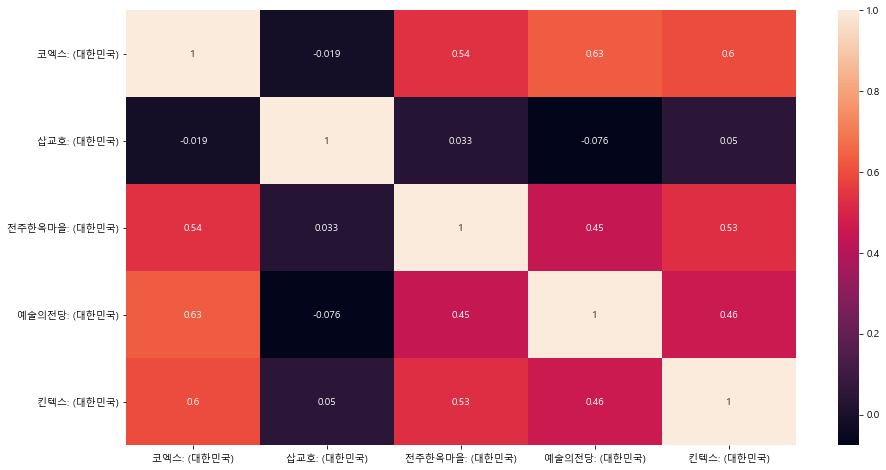

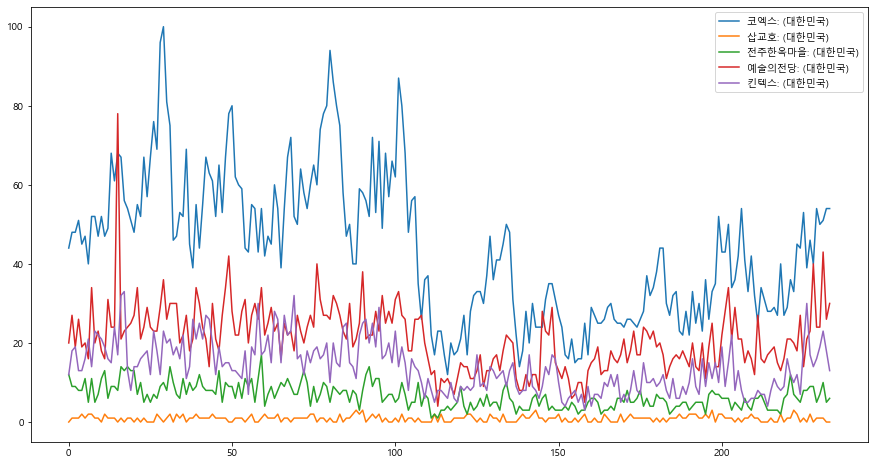

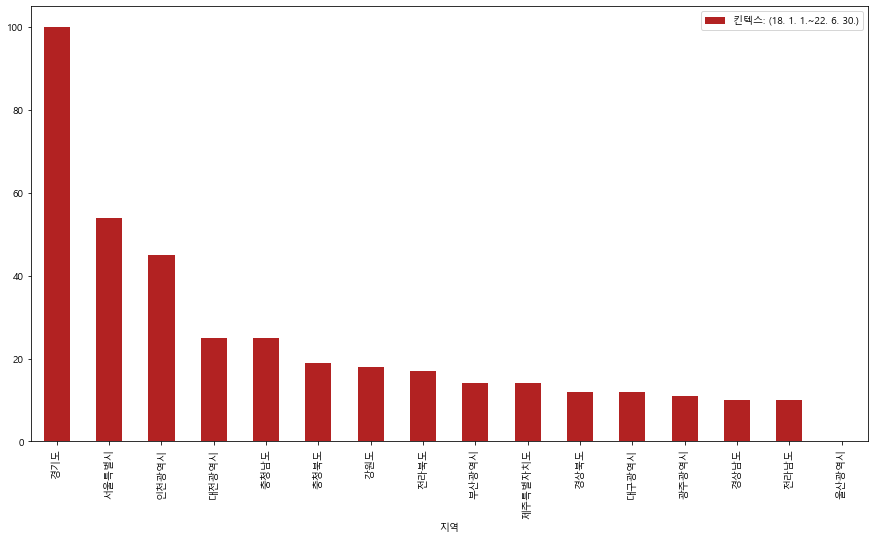

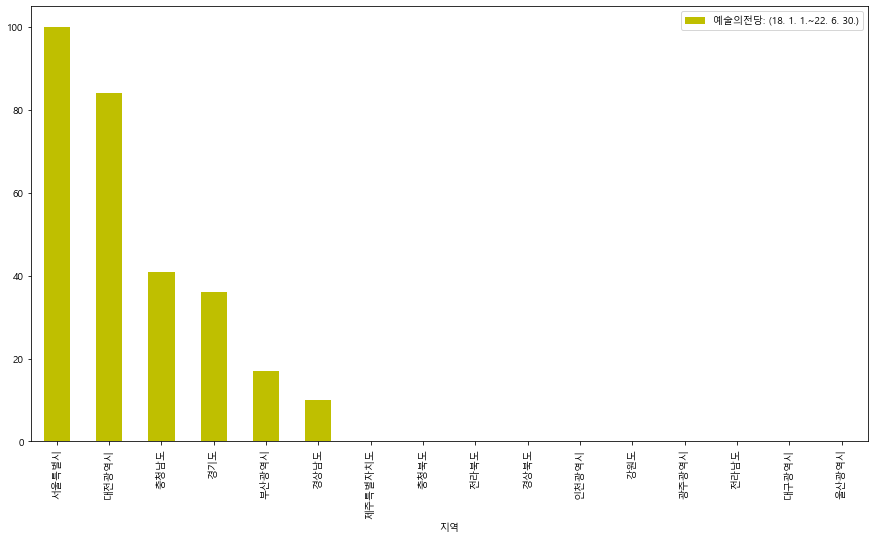

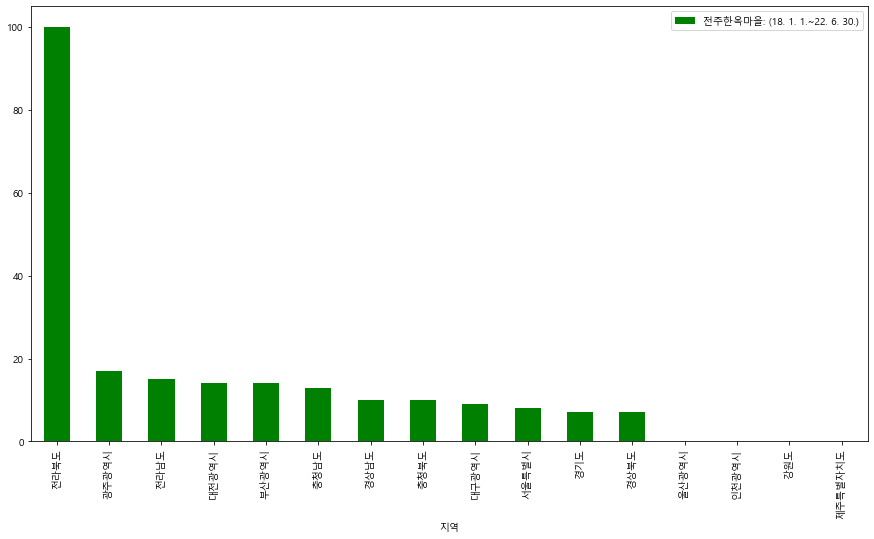

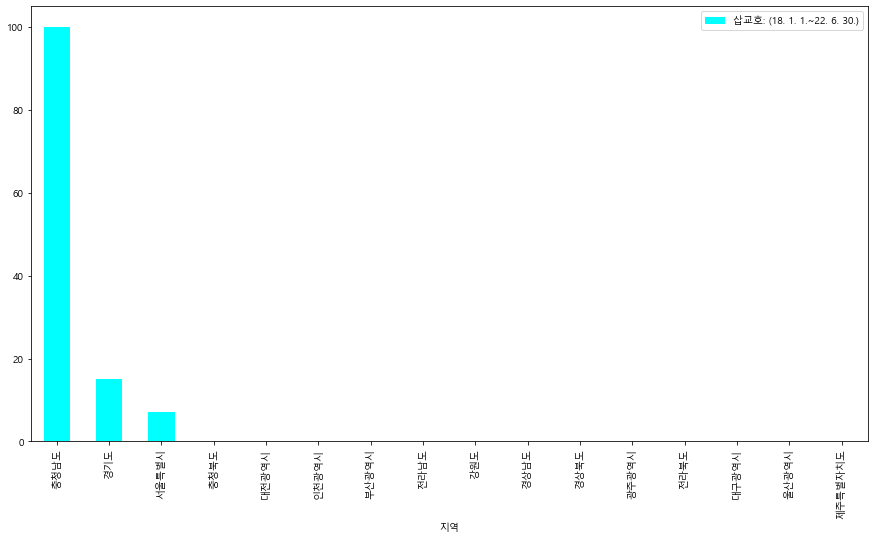

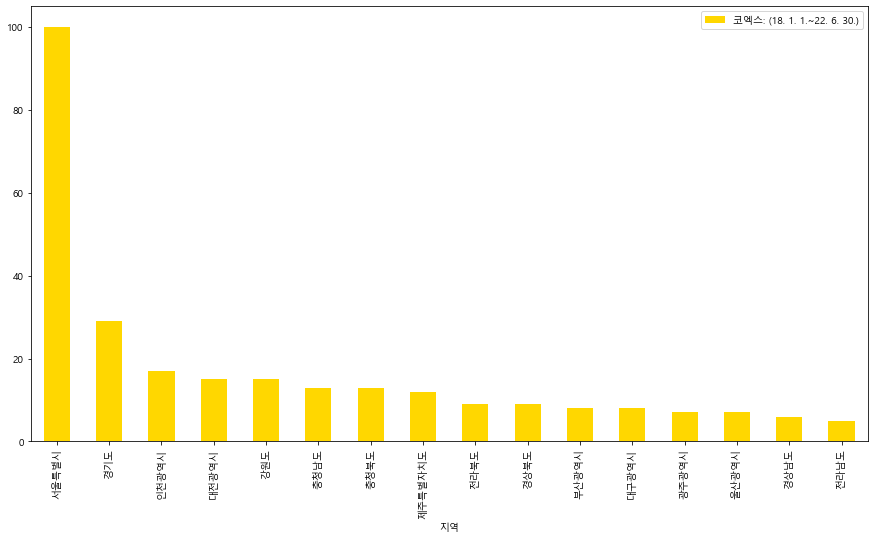

In [ ]:
# 기타
make_heatmap('guitar')
make_bar('guitar')

#### 결론: 관광명소들의 인기변화를 살펴봄으로써 국내 여행지 패키지 관광을 만드는 여행사들이나 한국여행을 계획중인 외국인들에게 여행계획을 짜는데에 판단을 줄 수 있습니다. 

# 코로나 시기와 관련해서 